# Sprint 論文読解

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#論文読解" data-toc-modified-id="論文読解-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>論文読解</a></span><ul class="toc-item"><li><span><a href="#問題" data-toc-modified-id="問題-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>問題</a></span></li><li><span><a href="#条件" data-toc-modified-id="条件-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>条件</a></span></li></ul></li></ul></div>

## このSprintについて
### Sprintの目的
* 機械学習分野の論文から有益な情報を引き出せるようにする
* これまで扱ってきた領域の論文から新たな知識を得る

### どのように学ぶか
ある論文に対しての問題に答えていくことで、読むポイントを学んでいきます。

## 論文読解
以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。

[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99
  
https://arxiv.org/pdf/1506.01497.pdf

### 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

### 条件
答える際は論文のどの部分からそれが分かるかを書く。
必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。

(1) 物体検出の分野にはどういった手法が存在したか。

Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, ...

SSPnet,Fast R-CNNといった手法が検出ネットワークの計算時間を減少させた。とある。

* SPPnet  
Adaptively-sized pooling (SPP) [1] on shared convolutional feature maps is developed for efficient region-based object detection [1],

* Fast R-CNN  
Fast R-CNN [2] enables end-to-end detector training on shared convolutional features and shows compelling accuracy and speed.

(2) Fasterとあるが、どういった仕組みで高速化したのか。  

Our observation is that the convolutional feature maps used by region-based detectors, like Fast R- CNN, can also be used for generating region proposals.  

* 検出ネットワークの畳み込み特徴マップは、領域提案ネットワークでも使用できることがわかった。とある。Fast R-CNNで検出だけに使われていた特徴マップを、領域提案でも使うことで高速化した。Fast R-CNNの課題が領域提案の計算が改善されていないことだった。

(3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

* One-Stage

参照論文：
OverFeat:Integrated Recognition, Localization and Detection using Convolutional Networks

The OverFeat paper [9] proposes a detection method that uses regressors and classifiers on sliding windows over convolutional feature maps.

（畳み込みした）特徴量マップを使って、回帰予測と分類をしている。  
どんな物体かの分類と、その物体と背景の境界の回帰予測を一度にしている。

* Two-Stage

ours is a two-stage cascade consisting of class-agnostic proposals and class-specific detections.

...

the region proposal task is only the first stage of Faster R- CNN—the downstream Fast R-CNN detector attends to the proposals to refine them. In the second stage of our cascade, the region-wise features are adaptively pooled [1], [2] from proposal boxes that more faith- fully cover the features of the regions. We believe these features lead to more accurate detections.

まず（どんな物体かは考慮しない）対象の領域提案だけ行う。  
次に、検出ネットワークで物体を特定する。(今回のFaster R-CNN)

* 比較結果  
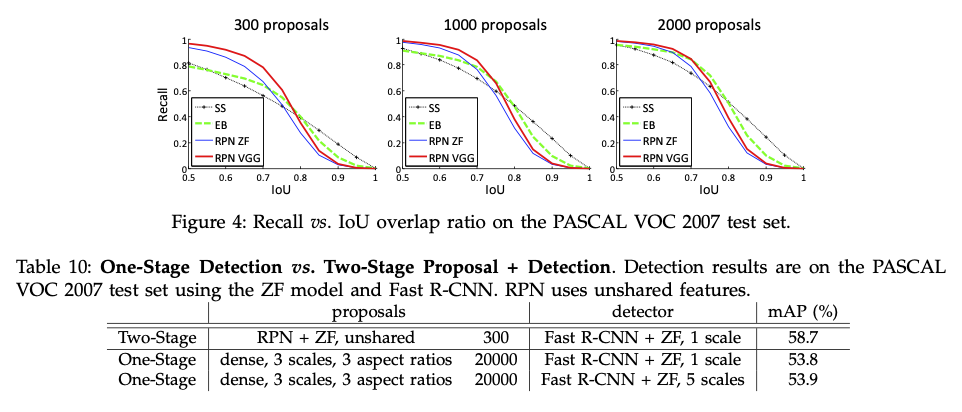

(4) RPNとは何か。

To generate region proposals, we slide a small network over the convolutional feature map output by the last shared convolutional layer. This small network takes as input an n × n spatial window of the input convolutional feature map. Each sliding window is mapped to a lower-dimensional feature(...).  

This feature is fed into two sibling fully-connected layers—a box-regression layer (reg) and a box-classification layer (cls).

（検出ネットワークと共有する）畳み込み層が出力した特徴量マップを、n×nのフィルタで畳み込みを行い、低次元の特徴量マップを作る。この特徴量マップを、回帰予測(reg)と分類(cls)に使う。このような処理を行うネットワーク

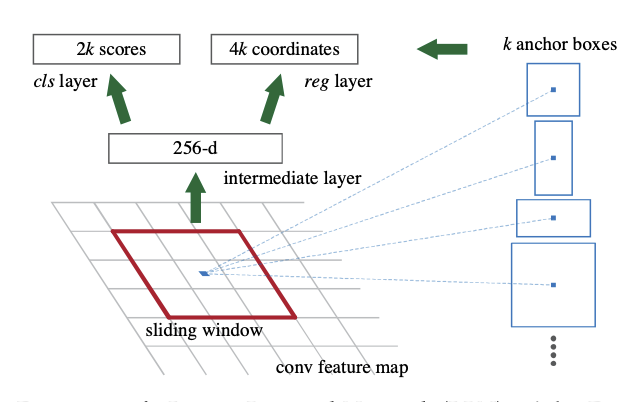

(5) RoIプーリングとは何か。  

[2] R. Girshick, “Fast R-CNN,” in IEEE International Conference on Computer Vision (ICCV), 2015.  
  
Fast R-CNNを引用：  
The RoI pooling layer uses max pooling to convert the features inside any valid region of interest into a small fea- ture map with a fixed spatial extent of H × W (e.g., 7 × 7), where H and W are layer hyper-parameters that are inde- pendent of any particular RoI. In this paper, an RoI is a rectangular window into a conv feature map. Each RoI is defined by a four-tuple (r, c, h, w) that specifies its top-left corner (r, c) and its height and width (h, w).

RoI プーリングレイヤは、max プーリングを使用して、領域内の特徴から、H × W (例えば、7 × 7) の小さなフィーチャーマップを作る。各RoIは左上隅(r, c)と高さと幅(h, w)を指定する4つのタプル(r, c, h, w)で定義される。これの元は、SPPnetのspatial pyramid poolingの考え方。

(6) Anchorのサイズはどうするのが適切か。

Our method classifies and regresses bounding boxes with reference to anchor boxes of multiple scales and aspect ratios. It only relies on images and feature maps of a single scale, and uses filters (sliding win- dows on the feature map) of a single size. 

our anchor-based method is built on a pyramid of anchors, which is more cost-efficient. Our method classifies and regresses bounding boxes with reference to anchor boxes of multiple scales and aspect ratios. It only relies on images and feature maps of a single scale, and uses filters (sliding windows on the feature map) of a single size. We show by experiments the effects of this scheme for addressing multiple scales and sizes (Table 8).

アンカーボックスのサイズは、ハイパーパラメータ。サイズとアスペクト比で決める。  
今回は、以下のパラメータでの実験結果を示している（表8）。   
size:128x128,256x256,512x512, aspect ratio: 1:1,1:2,2:1が一番良い結果を示している.

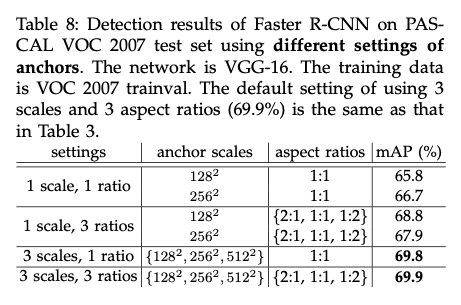

(7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。  
* PASCAL VOC 2007, 2012
* MS COCO datasets

上記のデータセットについて、mAP(mean Average Precision)が向上している。

We primarily evaluate detection mean Average Precision (mAP), because this is the actual metric for object detection (rather than focusing on object proposal proxy metrics).
  
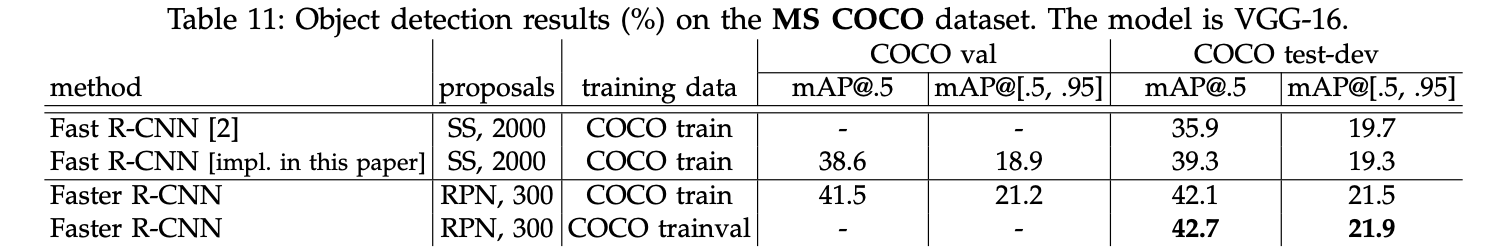

(8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。